In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import scipy.io
import scipy as sp

In [47]:
# function to calculate A and B from the dataset
def OUanalytic(data):
    N = data.size
    data1sq = data[0]**2
    dataNsq = data[-1]**2
    datasq = np.sum(data[1:-1]**2)
    datacorr = np.sum(data[0:-1]*data[1:])
    coef = [(N-1)*datasq,
       (2.0-N)*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       N*datacorr]
    B=np.roots(coef)[-1]
    Q=(data1sq+dataNsq)/(1-B**2)
    Q=Q+datasq*(1+B**2)/(1-B**2)
    Q=Q-datacorr*2*B/(1-B**2)
    A = Q/N
    P2A = -N/A**2/2
    Btmp = B**2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B**4*(N-1))*datasq - 2*B*(1+B**2+2*N)*datacorr
    P2B = -tmp/((1-B**2)**2*(data1sq+dataNsq + (1+B**2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B**2)
    dA = np.sqrt(-P2B/(P2A*P2B-PAB**2))
    dB = np.sqrt(-P2A/(P2A*P2B-PAB**2))
    return A,dA,B,dB

def OUresult(data,deltat):
    A, dA, B ,dB = OUanalytic(data)
    tau = -deltat/np.log(B)
    dtau = deltat*dB/B/np.log(B)**2
    return A,dA,tau,dtau

In [48]:
oxy_sub1=scipy.io.loadmat('oxytocinRSdata/subject2.mat')
oxy_sub1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Dec 17 12:41:46 2018',
 '__version__': '1.0',
 '__globals__': [],
 'mts': array([[[ 0.7748968 ,  0.47561213, -0.86304015, ..., -2.37069392,
          -2.8252027 , -2.04952598]],
 
        [[ 1.97121501, -2.58889389, -0.74325913, ..., -7.61186075,
          -8.28248501, -4.12624931]],
 
        [[ 0.02394066,  0.70461935, -0.79228407, ..., -6.14399004,
          -4.91166306,  0.14375119]],
 
        [[-0.44157708,  0.46943286,  0.08021148, ..., -2.21517515,
          -3.43305469, -0.07751571]]]),
 'roi_name': array([['LLP.nii '],
        ['mPFC.nii'],
        ['PCC.nii '],
        ['RLP.nii ']], dtype='<U8'),
 'roi_size': array([[1041],
        [1346],
        [4833],
        [1326]])}

In [49]:
llp = oxy_sub1['mts'][0][0]
mpfc = oxy_sub1['mts'][1][0]
pcc = oxy_sub1['mts'][2][0]
rlp = oxy_sub1['mts'][3][0]

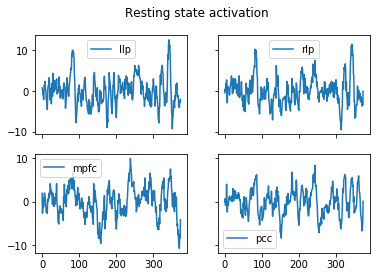

In [50]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Resting state activation')
ax1.plot(llp, label="llp")
ax1.legend()
ax2.plot(rlp,label = "rlp")
ax2.legend()
ax3.plot(mpfc,label = "mpfc")
ax3.legend()
ax4.plot(pcc,label = "pcc")
ax4.legend()

mean:  1.1813353727208101e-08
var:  11.703381372433007
N:  374
relaxation time: 5.261809235906701 SD tau 1.0580857976967366
A  11.684939232670025 SD A 2.1788951995268477


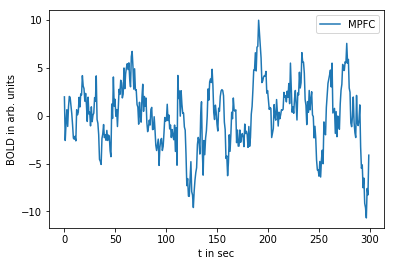

In [51]:
print("mean: ",mpfc.mean())
print("var: ",mpfc.std()**2)
N=len(mpfc)
print("N: ",N)
mpfc_A,mpfc_sA, mpfc_tau, mpfc_dtau = OUresult(mpfc,0.802)
print("relaxation time:",mpfc_tau, "SD tau", mpfc_dtau)
print("A ",mpfc_A,"SD A",mpfc_sA)
mpfc_norm=mpfc/np.sqrt(mpfc_A)
t = np.arange(N)*0.802 # tR = 0.802 sec
plt.plot(t,mpfc,label="MPFC")
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")
plt.legend()

mean:  -4.0627079692116396e-09
var:  8.693202451440483
N:  374
relaxation time: 5.436707062962586 SD tau 1.0980019831321868
A  8.559977897539508 SD A 1.609057480510008
1.0077517830776932


Text(0,0.5,'BOLD in arb. units')

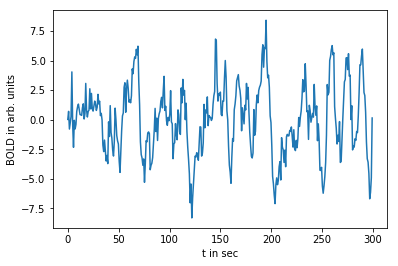

In [52]:
print("mean: ",pcc.mean())
print("var: ",pcc.std()**2)
N=len(pcc)
print("N: ",N)
pcc_A,pcc_sA, pcc_tau, pcc_dtau = OUresult(pcc,0.802)
print("relaxation time:",pcc_tau, "SD tau", pcc_dtau)
print("A ",pcc_A,"SD A",pcc_sA)
pcc_norm=pcc/np.sqrt(pcc_A)
print(pcc_norm.std())
plt.plot(t,pcc)
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")

mean:  -5.311526876082395e-09
var:  10.90560202116495
N:  374
relaxation time: 3.8085083401213833 SD tau 0.6691640092284075
A  10.796390947001418 SD A 1.7140264821231819
1.0050450322322868


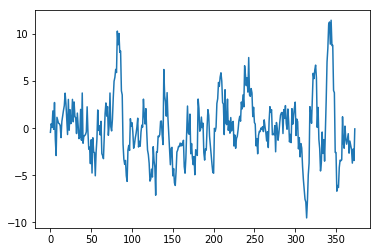

In [53]:
plt.plot(rlp)
print("mean: ",rlp.mean())
print("var: ",rlp.std()**2)
N=len(rlp)
print("N: ",N)
rlp_A,rlp_sA, rlp_tau, rlp_dtau = OUresult(rlp,0.802)
print("relaxation time:",rlp_tau, "SD tau", rlp_dtau)
print("A ",rlp_A,"SD A",rlp_sA)
rlp_norm=rlp/np.sqrt(rlp_A)
print(rlp_norm.std())

mean:  -3.5011752403993657e-09
var:  12.248893869840153
N:  374
relaxation time: 4.488077880683678 SD tau 0.8411768630714334
A  12.127808626734256 SD A 2.0840745035348434
1.0049796510838618


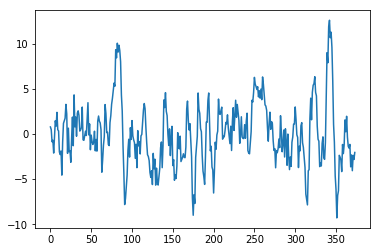

In [54]:
plt.plot(llp)
print("mean: ",llp.mean())
print("var: ",llp.std()**2)
N=len(llp)
print("N: ",N)
llp_A,llp_sA, llp_tau, llp_dtau = OUresult(llp,0.802)
print("relaxation time:",llp_tau, "SD tau", llp_dtau)
print("A ",llp_A,"SD A",llp_sA)
llp_norm=llp/np.sqrt(llp_A)
print(llp_norm.std())

In [56]:
def OUcross(data1,data2):
    x1 = data1 + data2
    x2 = data1 - data2
    x1_A,x1_dA, x1_tau ,x1_dtau= OUresult(x1,0.802)
    x2_A, x2_dA, x2_tau ,x2_dtau= OUresult(x2,0.802)
    return (x1_A - x2_A)/x2_A, np.sqrt(x1_dA**2 + x1_A**2*x2_dA**2/x2_A**4)
print("MPFC:PCC",OUcross(mpfc_norm,pcc_norm))
print("MPFC:RLP",OUcross(mpfc_norm,rlp_norm))
print("MPFC:LLP",OUcross(mpfc_norm,llp_norm))
print("PCC:RLP",OUcross(pcc_norm,rlp_norm))
print("PCC:LLP",OUcross(pcc_norm,llp_norm))
print("RLP:LLP",OUcross(rlp_norm,llp_norm))
print("Pearson MPFC:PCC",sp.stats.pearsonr(mpfc_norm,pcc_norm))
print("Pearson MPFC:RLP",sp.stats.pearsonr(mpfc_norm,rlp_norm))
print("Pearson MPFC:LLP",sp.stats.pearsonr(mpfc_norm,llp_norm))
print("Pearson PCC:RLP",sp.stats.pearsonr(pcc_norm,rlp_norm))
print("Pearson PCC:LLP",sp.stats.pearsonr(pcc_norm,llp_norm))
print("Pearson RLP:LLP",sp.stats.pearsonr(rlp_norm,llp_norm))

MPFC:PCC (2.998323019442846, 0.8870258572392288)
MPFC:RLP (3.0452997310798016, 0.8652521848736678)
MPFC:LLP (1.4378985504884052, 0.6680673533544847)
PCC:RLP (5.047828642967153, 1.135620586159785)
PCC:LLP (1.4873378825671963, 0.6785083955043144)
RLP:LLP (6.457812159675988, 1.1069098944580038)
Pearson MPFC:PCC (0.6045584666582217, 1.2200601052686263e-38)
Pearson MPFC:RLP (0.607212788202456, 4.720450887364107e-39)
Pearson MPFC:LLP (0.4156494994196419, 4.6911548740170084e-17)
Pearson PCC:RLP (0.716879431827639, 3.0769882024140075e-60)
Pearson PCC:LLP (0.4273700053685153, 4.8854532821563826e-18)
Pearson RLP:LLP (0.7654844914541944, 3.1638944338348676e-73)
